In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection

In [12]:
df = pd.read_csv('../data/PetFinder_train.csv')

In [15]:
df.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In this notebook, I will compare: 1) vanilla logistic regression, 2) ridge regression, and 3) lasso regression.
To do this, I'll need to change the adoption speed parameter to being binary. I'll modify the output to be either the animals were adopted within 90 days or they were not.

In [18]:
df.AdoptionSpeed = df.AdoptionSpeed.replace({0:1, 1:1, 2:1, 3:1, 4:0})

In [19]:
df

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,1
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,1
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,1
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,1
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,1
5,2,NaN,3,266,0,2,5,6,0,2,...,1,1,0,41326,22fe332bf9c924d4718005891c63fbed,0,This is a stray kitten that came to my house. ...,d24c30b4b,2.0,1
6,2,BULAT,12,264,264,1,1,0,0,2,...,1,1,300,41326,1e0b5a458b5b77f5af581d57ebf570b3,0,anyone within the area of ipoh or taiping who ...,1caa6fcdb,3.0,1
7,1,Siu Pak & Her 6 Puppies,0,307,0,2,1,2,7,2,...,1,6,0,41326,1fba5f6e5480946254590d48f9c5198d,0,Siu Pak just give birth on 13/6/10 to 6puppies...,97aa9eeac,9.0,1
8,2,NaN,2,265,0,2,6,0,0,2,...,1,1,0,41326,d8af7afece71334473575c9f70daf00d,0,"healthy and active, feisty kitten found in nei...",c06d167ca,6.0,1
9,2,Kitty,12,265,0,2,1,7,0,2,...,1,1,0,41326,1f3f36e4b18e94855b3e88af0852fdc4,0,"Very manja and gentle stray cat found, we woul...",7a0942d61,2.0,0


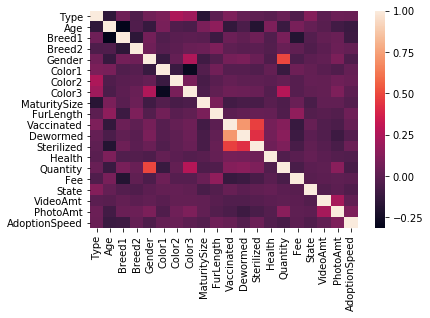

In [24]:
sns.heatmap(df.corr())

I'm actually pretty interested in how these regression models will deal with such poorly correlated features. Im just going to separate a group out to look at dogs specifically and then take a look.

In [33]:
df_dog = df[df.Type==1]
df_dog = df_dog.drop(['Type'], axis=1)
df_dog.describe()

,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,8132.000000,8132.000000,8132.000000,8132.000000,8132.000000,8132.000000,8132.000000,8132.000000,8132.000000,8132.000000,8132.000000,8132.000000,8132.000000,8132.000000,8132.000000,8132.000000,8132.000000,8132.000000,8132.000000
mean,12.906173,262.088416,78.932366,1.738072,2.077595,2.602312,1.329193,1.948475,1.465814,1.668101,1.542425,1.910723,1.037875,1.526808,24.294638,41342.316773,0.058657,3.731062,0.703148
std,21.377588,80.360298,126.944365,0.639196,1.593556,2.639396,2.633188,0.502045,0.585091,0.720179,0.731292,0.596714,0.203986,1.536229,90.085547,30.153834,0.364286,3.478076,0.456899
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,2.000000,218.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,1.000000,0.000000
50%,3.000000,307.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,1.000000
75%,12.000000,307.000000,179.000000,2.000000,2.000000,5.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41332.000000,0.000000,5.000000,1.000000
max,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,1.000000


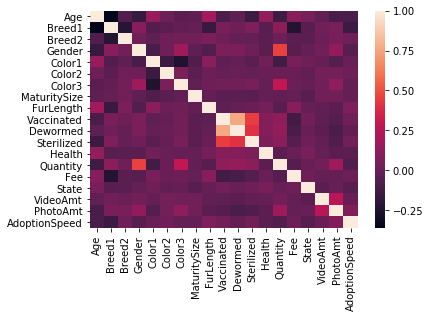

In [34]:
sns.heatmap(df_dog.corr())

In [59]:
df_dog.corr()

,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
Age,1.000000,-0.361992,-0.077744,-0.155445,0.149473,0.021587,-0.035717,-0.024904,0.195439,-0.088984,-0.029455,-0.143645,0.138841,-0.132851,0.098937,0.051227,-0.018702,-0.101292,-0.090904
Breed1,-0.361992,1.000000,-0.219966,0.103964,-0.065309,-0.034301,-0.012213,-0.006889,-0.157872,0.055880,0.019496,0.073640,-0.046706,0.121265,-0.230075,-0.046865,0.027777,0.056065,-0.146082
Breed2,-0.077744,-0.219966,1.000000,0.036663,-0.027253,0.023670,0.032980,0.031848,0.059048,0.020882,-0.001008,-0.009344,-0.042119,0.023441,-0.038019,-0.037840,0.014841,0.053624,0.022436
Gender,-0.155445,0.103964,0.036663,1.000000,-0.098129,0.025436,0.176916,-0.028647,-0.070971,0.068944,0.060347,0.025744,-0.041810,0.464302,-0.047916,-0.005579,0.033771,0.136207,-0.052764
Color1,0.149473,-0.065309,-0.027253,-0.098129,1.000000,-0.143572,-0.243934,-0.077091,0.108173,-0.031889,-0.010265,-0.040181,0.031062,-0.117779,0.054499,0.020307,-0.002545,-0.060251,0.004952
Color2,0.021587,-0.034301,0.023670,0.025436,-0.143572,1.000000,0.067007,-0.037926,0.011663,-0.005393,0.006257,-0.004273,0.004680,0.006755,0.006727,-0.015763,0.037311,0.040784,0.025392
Color3,-0.035717,-0.012213,0.032980,0.176916,-0.243934,0.067007,1.000000,-0.019450,0.019798,0.036350,0.035251,0.050798,-0.008332,0.287362,0.013242,-0.004986,0.034486,0.122778,-0.007700
MaturitySize,-0.024904,-0.006889,0.031848,-0.028647,-0.077091,-0.037926,-0.019450,1.000000,-0.015836,-0.036078,-0.036756,-0.042452,-0.008563,-0.013278,-0.007583,-0.043669,0.029304,0.034816,-0.006102
FurLength,0.195439,-0.157872,0.059048,-0.070971,0.108173,0.011663,0.019798,-0.015836,1.000000,-0.030871,-0.008251,0.005700,0.045886,-0.052070,0.106029,-0.002837,-0.018576,-0.040931,0.071068
Vaccinated,-0.088984,0.055880,0.020882,0.068944,-0.031889,-0.005393,0.036350,-0.036078,-0.030871,1.000000,0.766181,0.446749,0.092277,0.130489,-0.119826,0.027552,-0.029854,-0.056065,0.031694


In [20]:
df.dtypes

Type               int64
Name              object
Age                int64
Breed1             int64
Breed2             int64
Gender             int64
Color1             int64
Color2             int64
Color3             int64
MaturitySize       int64
FurLength          int64
Vaccinated         int64
Dewormed           int64
Sterilized         int64
Health             int64
Quantity           int64
Fee                int64
State              int64
RescuerID         object
VideoAmt           int64
Description       object
PetID             object
PhotoAmt         float64
AdoptionSpeed      int64
dtype: object

Still poor correlations.. let's see how these regressions work out.

Later on, I could do a get_dummies with the variables to see if I can parse out some better correlations, since many of these are rank order and not actually continuous.

In [63]:
X = df_dog[['Age', 'Gender', 'MaturitySize', 'Vaccinated', 'Health', 'Fee', 'State']]
y = df_dog[['AdoptionSpeed']]

In [53]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

In [61]:
vanilla = linear_model.LogisticRegression() # did not set C to anything here, which is parameter regularization
vanilla.fit(X_train, y_train.ravel())
vanilla.score(X_test, y_test)

0.7032786885245902

In [64]:
ridge = linear_model.LogisticRegression(penalty='l2')
ridge.fit(X_train, y_train.ravel())
ridge.score(X_test, y_test)

0.7032786885245902

In [65]:
lass = linear_model.LogisticRegression(penalty='l1')
lass.fit(X_train, y_train.ravel())
lass.score(X_test, y_test)

0.6995901639344262